In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Путь к файлу
file_path = r"C:\Users\User\Desktop\программирование\Project Fictional Pancake\дз 10\water.csv"

# Загрузка данных
data = pd.read_csv(file_path)

# Просмотр первых строк
print(data.head())

# Проверим информацию о датасете
print(data.info())


   Unnamed: 0 location        town  mortality  hardness
0           1    South        Bath       1247       105
1           2    North  Birkenhead       1668        17
2           3    South  Birmingham       1466         5
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB
None


In [10]:
print(data.columns)  # Список названий столбцов

Index(['Unnamed: 0', 'location', 'town', 'mortality', 'hardness'], dtype='object')


In [2]:
# Выделяем нужные переменные
x = data['hardness']  # Жёсткость воды
y = data['mortality']  # Средняя годовая смертность

# Проверяем данные
print(x.head())
print(y.head())

0    105
1     17
2      5
3     14
4     18
Name: hardness, dtype: int64
0    1247
1    1668
2    1466
3    1800
4    1609
Name: mortality, dtype: int64


1: Построить точечный график

Создаем график для визуализации зависимости между жесткостью воды и смертностью.




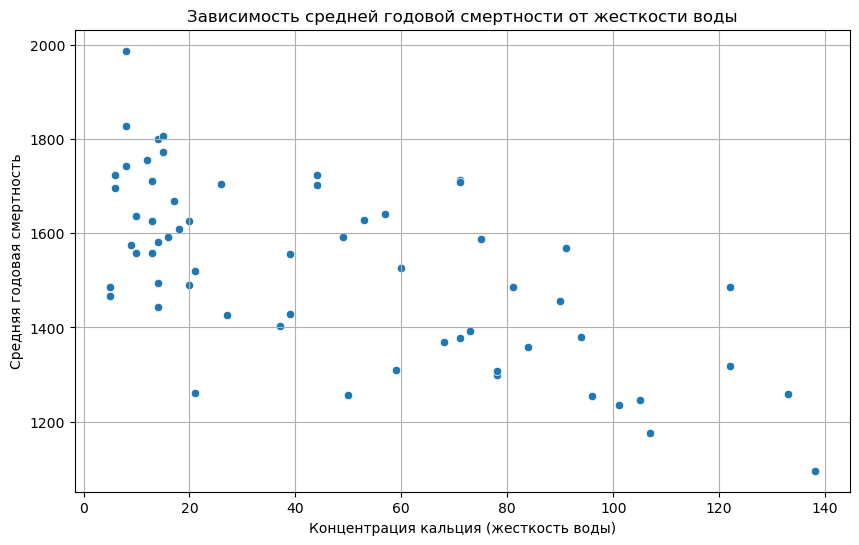

In [3]:
# Построение точечного графика
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.title("Зависимость средней годовой смертности от жесткости воды")
plt.xlabel("Концентрация кальция (жесткость воды)")
plt.ylabel("Средняя годовая смертность")
plt.grid()
plt.show()


2. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [4]:
# Расчет коэффициента корреляции Пирсона
pearson_corr, pearson_p = pearsonr(x, y)
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")

# Расчет коэффициента корреляции Спирмена
spearman_corr, spearman_p = spearmanr(x, y)
print(f"Коэффициент корреляции Спирмена: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")


Коэффициент корреляции Пирсона: -0.655, p-value: 0.000
Коэффициент корреляции Спирмена: -0.632, p-value: 0.000


Вывод

Задание 3: Построить модель линейной регрессии.

Построим простую линейную регрессию, чтобы исследовать связь между переменными.


Уравнение регрессии: y = 1676.356 + -3.226x


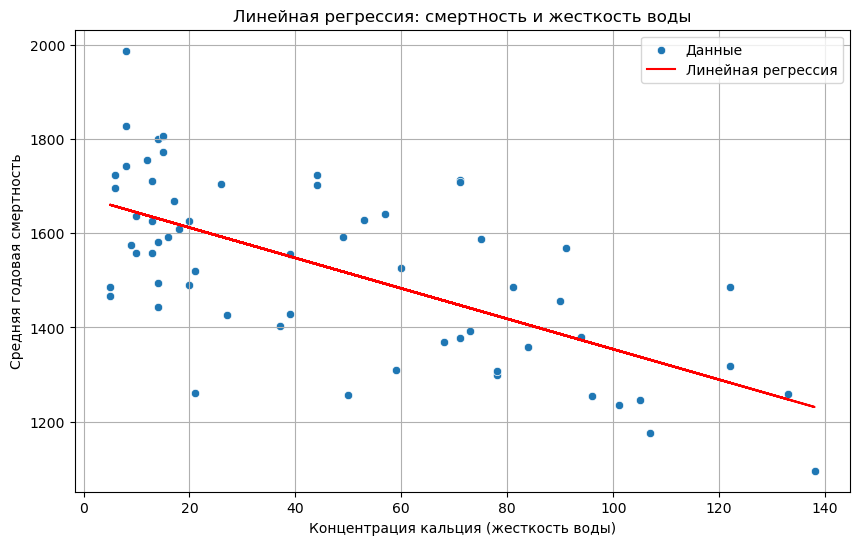

In [5]:
# Подготовка данных для модели
x_reshaped = x.values.reshape(-1, 1)  # Преобразуем x в двумерный массив для sklearn
model = LinearRegression()

# Обучение модели
model.fit(x_reshaped, y)

# Коэффициенты регрессии
print(f"Уравнение регрессии: y = {model.intercept_:.3f} + {model.coef_[0]:.3f}x")

# Построение линии регрессии
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, label="Данные")
plt.plot(x, model.predict(x_reshaped), color="red", label="Линейная регрессия")
plt.title("Линейная регрессия: смертность и жесткость воды")
plt.xlabel("Концентрация кальция (жесткость воды)")
plt.ylabel("Средняя годовая смертность")
plt.legend()
plt.grid()
plt.show()


Коэффициент корреляции Пирсона: -0.655, 
𝑝
p-value: 0.000
Это говорит о том, что существует сильная отрицательная линейная связь между жёсткостью воды и смертностью. Чем выше жёсткость воды, тем ниже средняя смертность. Малое 
𝑝
p-value подтверждает, что корреляция статистически значима.

Коэффициент корреляции Спирмена: -0.632, 
𝑝
p-value: 0.000
Это также указывает на сильную отрицательную корреляцию, но учитывает только ранговую (монотонную) зависимость. Опять же, 
𝑝
p-value показывает статистическую значимость.

In [6]:
# Расчет коэффициента детерминации
r2 = r2_score(y, model.predict(x_reshaped))
print(f"Коэффициент детерминации (R²): {r2:.3f}")


Коэффициент детерминации (R²): 0.429


Этот показатель говорит, что 42.9% вариации смертности можно объяснить жёсткостью воды на основе построенной модели линейной регрессии. Это подтверждает наличие связи, но оставляет значительную часть вариации, обусловленную другими факторами.

Выводы:
Сильная отрицательная корреляция подтверждается коэффициентами Пирсона и Спирмена.
Жёсткость воды объясняет 42.9% изменчивости в смертности, но есть и другие, не учтённые факторы.
Построенная модель может быть полезной для прогнозов, но не полностью объясняет зависимость.

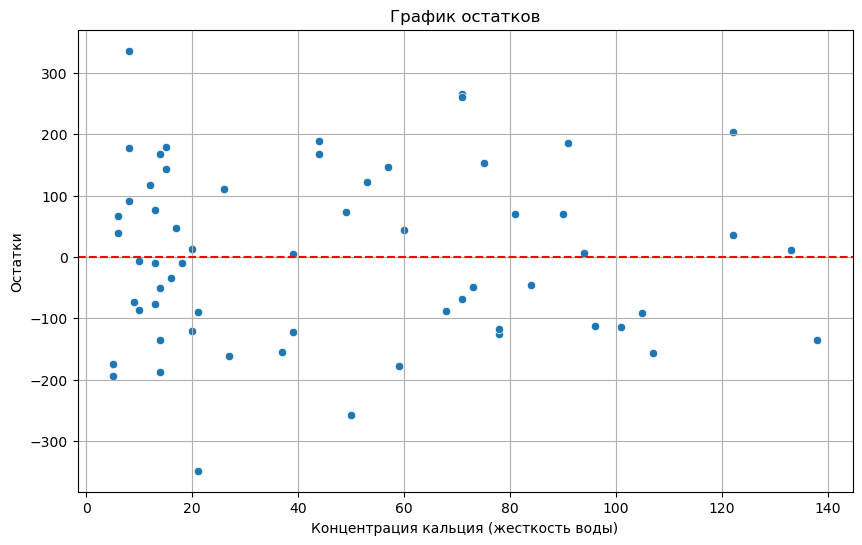

In [7]:
# Вычисление остатков
residuals = y - model.predict(x_reshaped)

# Построение графика остатков
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("График остатков")
plt.xlabel("Концентрация кальция (жесткость воды)")
plt.ylabel("Остатки")
plt.grid()
plt.show()


Задание 2

Ответьте на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? Для ответ выполните следующие шаги:

Разделим
 данные на 2 группы.
Повторите аналогичные шаги из пункта 1 для каждой группы по отдельности.

Для выполнения этого задания сначала нужно разделить данные на две группы: северные города и южные города. Затем повторим шаги из первого задания для каждой группы. Начнём с разделения данных

In [8]:
#1. Разделение данных на северные и южные города

northern_data = data[data['location'] == 'North']
southern_data = data[data['location'] == 'South']

print(f"Количество северных городов: {len(northern_data)}")
print(f"Количество южных городов: {len(southern_data)}")



Количество северных городов: 35
Количество южных городов: 26


In [9]:
# Северные города
x_north = northern_data['hardness']
y_north = northern_data['mortality']

pearson_corr_north, pearson_pval_north = pearsonr(x_north, y_north)
spearman_corr_north, spearman_pval_north = spearmanr(x_north, y_north)

print(f"Северные города:")
print(f"  Коэффициент корреляции Пирсона: {pearson_corr_north:.3f}, p-value: {pearson_pval_north:.3f}")
print(f"  Коэффициент корреляции Спирмена: {spearman_corr_north:.3f}, p-value: {spearman_pval_north:.3f}")

# Южные города
x_south = southern_data['hardness']
y_south = southern_data['mortality']

pearson_corr_south, pearson_pval_south = pearsonr(x_south, y_south)
spearman_corr_south, spearman_pval_south = spearmanr(x_south, y_south)

print(f"Южные города:")
print(f"  Коэффициент корреляции Пирсона: {pearson_corr_south:.3f}, p-value: {pearson_pval_south:.3f}")
print(f"  Коэффициент корреляции Спирмена: {spearman_corr_south:.3f}, p-value: {spearman_pval_south:.3f}")


Северные города:
  Коэффициент корреляции Пирсона: -0.369, p-value: 0.029
  Коэффициент корреляции Спирмена: -0.404, p-value: 0.016
Южные города:
  Коэффициент корреляции Пирсона: -0.602, p-value: 0.001
  Коэффициент корреляции Спирмена: -0.596, p-value: 0.001


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Северные города
model_north = LinearRegression()
model_north.fit(x_north.values.reshape(-1, 1), y_north)
y_pred_north = model_north.predict(x_north.values.reshape(-1, 1))
r2_north = r2_score(y_north, y_pred_north)
print(f"Северные города: Коэффициент детерминации (R²): {r2_north:.3f}")

# Южные города
model_south = LinearRegression()
model_south.fit(x_south.values.reshape(-1, 1), y_south)
y_pred_south = model_south.predict(x_south.values.reshape(-1, 1))
r2_south = r2_score(y_south, y_pred_south)
print(f"Южные города: Коэффициент детерминации (R²): {r2_south:.3f}")


Северные города: Коэффициент детерминации (R²): 0.136
Южные города: Коэффициент детерминации (R²): 0.363


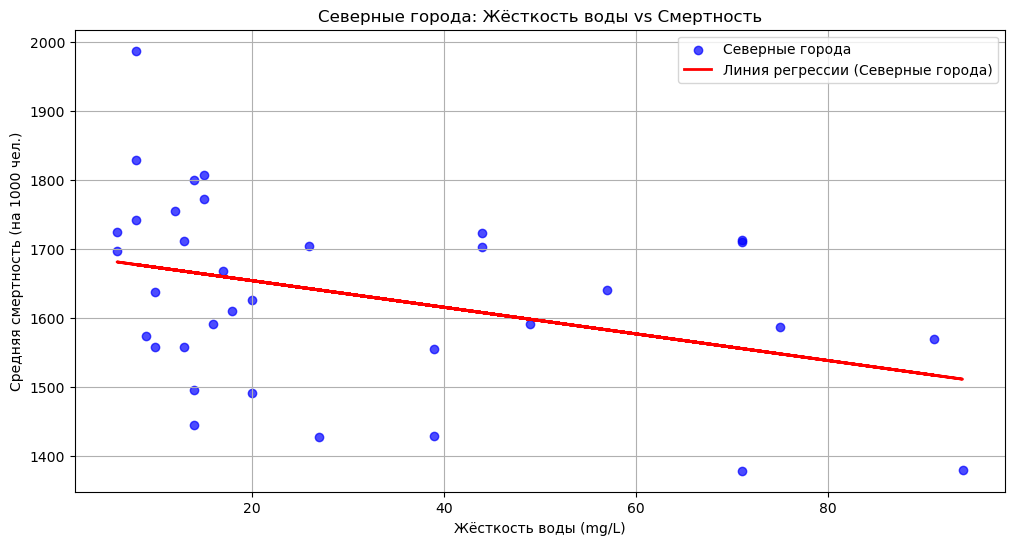

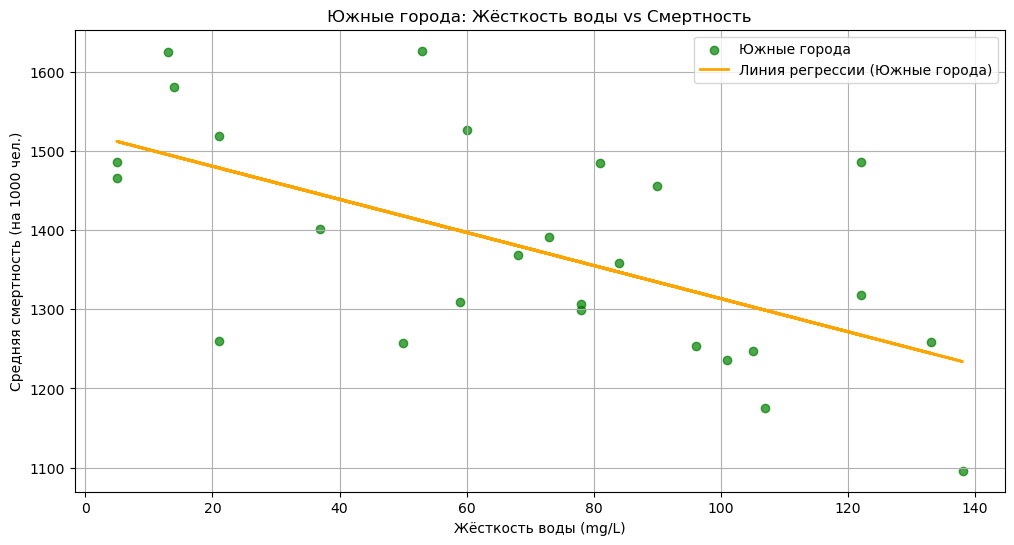

In [11]:
import matplotlib.pyplot as plt

# Точечный график: Северные города
plt.figure(figsize=(12, 6))
plt.scatter(x_north, y_north, label="Северные города", color="blue", alpha=0.7)
plt.plot(x_north, y_pred_north, color="red", label="Линия регрессии (Северные города)", linewidth=2)
plt.title("Северные города: Жёсткость воды vs Смертность")
plt.xlabel("Жёсткость воды (mg/L)")
plt.ylabel("Средняя смертность (на 1000 чел.)")
plt.legend()
plt.grid(True)
plt.show()

# Точечный график: Южные города
plt.figure(figsize=(12, 6))
plt.scatter(x_south, y_south, label="Южные города", color="green", alpha=0.7)
plt.plot(x_south, y_pred_south, color="orange", label="Линия регрессии (Южные города)", linewidth=2)
plt.title("Южные города: Жёсткость воды vs Смертность")
plt.xlabel("Жёсткость воды (mg/L)")
plt.ylabel("Средняя смертность (на 1000 чел.)")
plt.legend()
plt.grid(True)
plt.show()


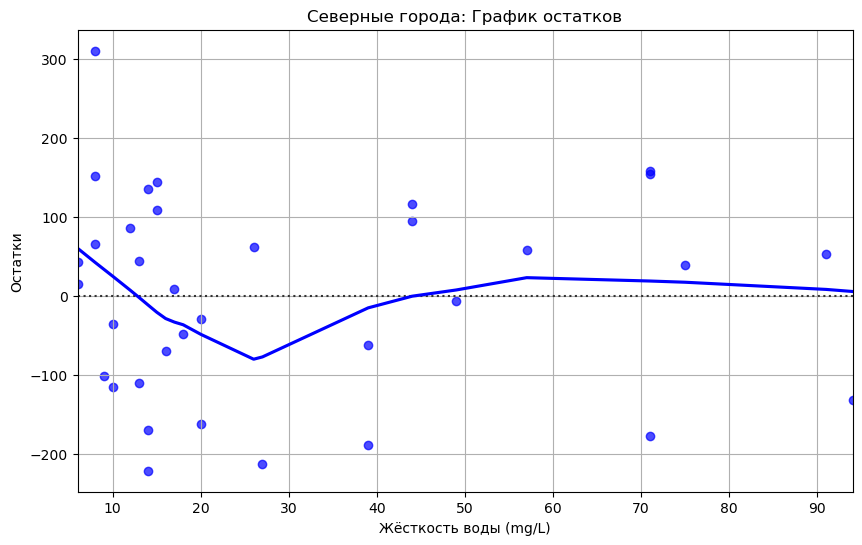

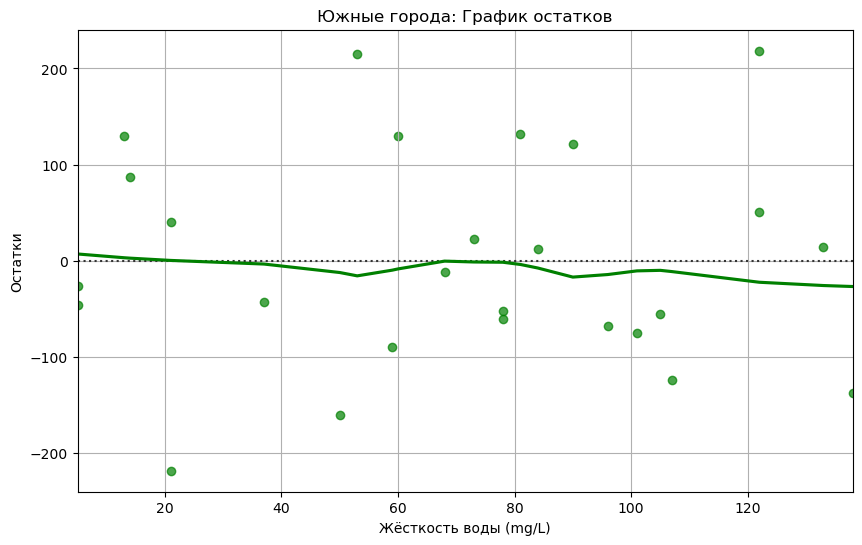

In [12]:
import seaborn as sns

# График остатков: Северные города
residuals_north = y_north - y_pred_north
plt.figure(figsize=(10, 6))
sns.residplot(x=x_north, y=y_north, lowess=True, color="blue", scatter_kws={'alpha': 0.7})
plt.title("Северные города: График остатков")
plt.xlabel("Жёсткость воды (mg/L)")
plt.ylabel("Остатки")
plt.grid(True)
plt.show()

# График остатков: Южные города
residuals_south = y_south - y_pred_south
plt.figure(figsize=(10, 6))
sns.residplot(x=x_south, y=y_south, lowess=True, color="green", scatter_kws={'alpha': 0.7})
plt.title("Южные города: График остатков")
plt.xlabel("Жёсткость воды (mg/L)")
plt.ylabel("Остатки")
plt.grid(True)
plt.show()


На основании полученных данных можно сделать следующие выводы:

1. **Коэффициенты корреляции**:
   - В северных городах наблюдается слабая отрицательная корреляция между жёсткостью воды и уровнем смертности: коэффициент корреляции Пирсона составляет -0.369, а Спирмена — -0.404. Это указывает на тенденцию к снижению смертности с увеличением жёсткости воды, но зависимость слабая. 
   - Для южных городов корреляция более выражена: коэффициенты Пирсона (-0.602) и Спирмена (-0.596) показывают умеренную отрицательную связь между жёсткостью воды и смертностью. Это свидетельствует о том, что в южных городах повышение жёсткости воды более заметно связано с уменьшением смертности.

2. **Статистическая значимость**:
   - Во всех случаях p-value меньше 0.05, что позволяет считать обнаруженные корреляции статистически значимыми как для северных, так и для южных городов.

3. **Коэффициент детерминации (R²)**:
   - Для северных городов R² составляет 0.136, что указывает на то, что линейная модель объясняет всего 13.6% вариации смертности. Это означает, что жёсткость воды оказывает лишь слабое влияние на смертность в северных городах, и другие факторы оказывают более значительное воздействие.
   - В южных городах R² равен 0.363, что говорит о более сильной связи между жёсткостью воды и смертностью: 36.3% вариации смертности можно объяснить линейной моделью. Это подтверждает, что в южных городах жёсткость воды имеет более заметное влияние на смертность.

4. **Общая интерпретация**:
   - В южных городах влияние жёсткости воды на смертность более выражено, чем в северных. Это может быть связано с климатическими, географическими или социально-экономическими факторами. 
   - Для северных городов требуется учитывать дополнительные переменные, чтобы лучше понять причины вариации смертности.